# Elastica

We first find the value of $K$ in the following equation:
\begin{gather}
\frac{P}{P_{\rm Euler}} = \frac{2}{\pi} \int_0^{\pi/2} \frac{{\rm d} \varphi}{\sqrt{1-K^2 \sin^2 \varphi}}
\end{gather}

To evaluate the complete elliptic integral of the first kind, we use the built-in `ellipk` function within `scipy.special`. 

In [1]:
import numpy as np
from scipy.optimize import root
from scipy.special import ellipk

In [2]:
P_by_PE = 1.1
def myfun_elastica(K):
    return P_by_PE - 2/np.pi*ellipk(K)

0

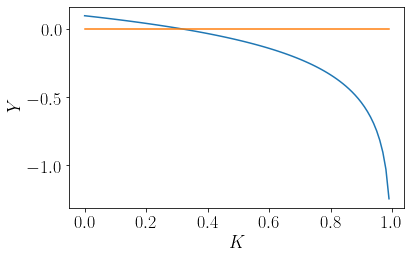

In [3]:
%matplotlib inline

import matplotlib

matplotlib.rcParams.update({'font.size': 18,'text.usetex':True}) #'font.family': 'serif'})

count = 0
N = 100
res = np.zeros(N)


#Kvalues = np.zeros(N)
#for Ktrial in np.arange(0,1,1/N):
#    res[count] = myfun_elastica(Ktrial)
#    Kvalues[count] = Ktrial
#    count = count + 1

K_values = np.arange(0,1,1/N)
for idx, Ktrial in enumerate(K_values):
    res[idx] = myfun_elastica(Ktrial)


import matplotlib.pyplot as plt


#fig, ax = plt.subplots(figsize=(1.97,1.97/1.62), nrows=1, ncols=1)

fig, ax = plt.subplots(figsize=(6,6/1.62), nrows=1, ncols=1)
ax.plot(K_values,res)
ax.plot(K_values,np.zeros(N))
ax.grid(False)
ax.set_xlabel(r'$K$')
ax.set_ylabel(r'$Y$')
ax.margins(0.05)
fig.savefig("elastica4.pdf",bbox_inches="tight", pad_inches= 0.05, dpi=600)

import os 
os.system('start elastica4.pdf')

The above plot shows approximately where the RHS of Eq. (1) intersects the value of $\displaystyle \frac{P}{P_{\rm Euler}}$. We find the refined solution through the root finding capability of SciPy as follows: 

In [4]:
soln = root(myfun_elastica,0.95)
K = soln.x[0]
display(K)

0.3234678688991268

Finally, we obtain the deflection values using
\begin{gather}
w = \frac{2}{\pi}\sqrt{\frac{P_{\rm Euler}}{P}(K^2 - \sin^2 \frac{\theta}{2})} \tag{2} \\
\text{or,} \quad w = \frac{2}{\pi}\sqrt{\frac{P_{\rm Euler}}{P}(K^2 - K^2 \sin^2 \varphi)}, \tag{3}
\end{gather}
where we use $\displaystyle \sin \frac{\theta}{2} = K \sin \varphi$.

We note that $\theta = \pm \alpha \implies \varphi = \pm\pi/2$ and $\theta = 0 \implies \varphi = 0$. So when $\theta$ goes from $-\alpha$ to $\alpha$ through $0$, $\varphi$ goes from $\displaystyle -\frac{\pi}{2}$ to $\displaystyle \frac{\pi}{2}$ through 0. 

Text(0, 0.5, '$w$')

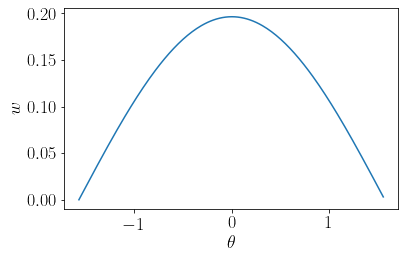

In [10]:
%matplotlib inline 
matplotlib.rcParams.update({'font.size': 18,'text.usetex':True})


n = 200
w_values = np.zeros(n)
phi_values = np.arange(-np.pi/2,np.pi/2,np.pi/n)

for idx, phi_trial in enumerate(phi_values):
    w_values[idx] = 2/np.pi*np.sqrt(1/P_by_PE*( K**2 - K**2*(np.sin(phi_trial))**2) )

fig, ax = plt.subplots(figsize=(6,6/1.62),nrows=1, ncols=1)    
    
ax.plot(phi_values,w_values)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$w$')

In [37]:
5/2.54

1.968503937007874